In [1]:
%load_ext autoreload
%autoreload 2

In [41]:
%matplotlib inline

In [4]:
import sys
sys.path.append('/home/fero/wspace/data-science/corona')

In [13]:
import procdata
import pandas as pd

In [58]:
covid_df = procdata.get_covid_df()

In [59]:
gm_df = procdata.get_google_mobility_df(covid_df)

In [65]:
    url = 'https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv'
    
    df = pd.read_csv(url, nrows=1)
    dtypes = {col: 'float' if col.endswith('baseline') else 'object' for col in df.columns}

    df = pd.read_csv(url, dtype=dtypes)

    covid_countries = covid_df[['country_id', 'country']].drop_duplicates()

    # we use country as written in Covid dataset whenever possible - the rest we drop
    df = df.join(covid_countries.set_index('country_id'), on='country_region_code')
    df['country_region'] = df[['country', 'country_region']].fillna(method='bfill', axis=1).iloc[:, 0]
#     df = df[df['country_region'].isin(covid_countries['country'])]


In [68]:
covid_countries['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cases on an international conveyance Japan', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo', 'Costa Rica', 'Cote dIvoire', 'Croatia', 'Cuba',
       'CuraÃ§ao', 'Cyprus', 'Czechia',
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Es

In [66]:
df[df['country_region'] == 'United Kingdom']

,country_region_code,country_region,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,country
20877,GB,United Kingdom,NaN,NaN,2020-02-15,-12.0,-7.0,-35.0,-12.0,-4.0,2.0,NaN
20878,GB,United Kingdom,NaN,NaN,2020-02-16,-7.0,-6.0,-28.0,-7.0,-3.0,1.0,NaN
20879,GB,United Kingdom,NaN,NaN,2020-02-17,10.0,1.0,24.0,-2.0,-14.0,2.0,NaN
20880,GB,United Kingdom,NaN,NaN,2020-02-18,7.0,-1.0,20.0,-3.0,-14.0,2.0,NaN
20881,GB,United Kingdom,NaN,NaN,2020-02-19,6.0,-2.0,8.0,-4.0,-14.0,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
29514,GB,United Kingdom,York,NaN,2020-04-07,-77.0,-35.0,-13.0,-77.0,-75.0,28.0,NaN
29515,GB,United Kingdom,York,NaN,2020-04-08,-77.0,-34.0,-24.0,-80.0,-75.0,28.0,NaN
29516,GB,United Kingdom,York,NaN,2020-04-09,-75.0,-27.0,-35.0,-79.0,-74.0,28.0,NaN
29517,GB,United Kingdom,York,NaN,2020-04-10,-82.0,-39.0,-39.0,-82.0,-84.0,33.0,NaN


In [61]:
gm_df[gm_df['country'] == 'United Kingdom']

,country,date,pc_retail_and_recreation,pc_grocery_and_pharmacy,pc_parks,pc_transit_stations,pc_workplaces,pc_residential


In [57]:
df[df['country'] == 'United Kingdom']

,date,day,month,year,cases,deaths,country,country_id,population,tot_deaths,tot_cases,pc_retail_and_recreation,pc_grocery_and_pharmacy,pc_parks,pc_transit_stations,pc_workplaces,pc_residential
11200,2020-04-19,19,4,2020,5525,888,United Kingdom,UK,66488991.0,15464,114217,NaN,NaN,NaN,NaN,NaN,NaN
11201,2020-04-18,18,4,2020,5599,847,United Kingdom,UK,66488991.0,14576,108692,NaN,NaN,NaN,NaN,NaN,NaN
11202,2020-04-17,17,4,2020,4617,861,United Kingdom,UK,66488991.0,13729,103093,NaN,NaN,NaN,NaN,NaN,NaN
11203,2020-04-16,16,4,2020,4603,761,United Kingdom,UK,66488991.0,12868,98476,NaN,NaN,NaN,NaN,NaN,NaN
11204,2020-04-15,15,4,2020,5252,778,United Kingdom,UK,66488991.0,12107,93873,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11306,2020-01-04,4,1,2020,0,0,United Kingdom,UK,66488991.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
11307,2020-01-03,3,1,2020,0,0,United Kingdom,UK,66488991.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
11308,2020-01-02,2,1,2020,0,0,United Kingdom,UK,66488991.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
11309,2020-01-01,1,1,2020,0,0,United Kingdom,UK,66488991.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
df = procdata.get_final_df()
df.head()

,date,day,month,year,cases,deaths,country,country_id,population,tot_deaths,tot_cases,pc_retail_and_recreation,pc_grocery_and_pharmacy,pc_parks,pc_transit_stations,pc_workplaces,pc_residential
0,2020-04-19,19,4,2020,63,0,Afghanistan,AF,37172386.0,30,908,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-04-18,18,4,2020,51,1,Afghanistan,AF,37172386.0,30,845,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-04-17,17,4,2020,10,4,Afghanistan,AF,37172386.0,29,794,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-04-16,16,4,2020,70,2,Afghanistan,AF,37172386.0,25,784,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-04-15,15,4,2020,49,2,Afghanistan,AF,37172386.0,23,714,NaN,NaN,NaN,NaN,NaN,NaN


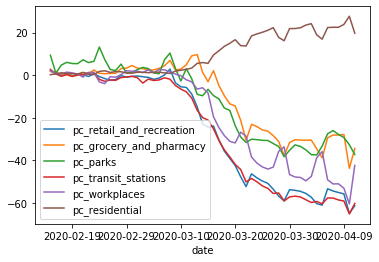

In [55]:
df.groupby('date').mean()[[c for c in df.columns if c.startswith('pc')]].plot()

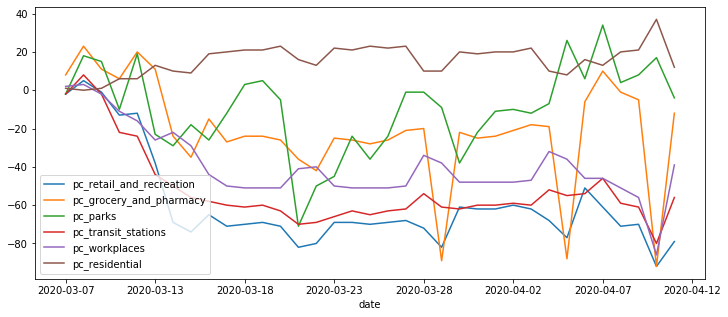

In [46]:
pc_cols = [c for c in df.columns if c.startswith('pc_')]
df[df['country'] == 'Slovakia'].set_index('date').sort_index()[pc_cols].plot(figsize=(12,5 ))

In [10]:
covid_df = procdata.get_covid_df()

In [31]:
url = 'https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv'
df = pd.read_csv(url, nrows=1)
dtypes = {col: 'float' if col.endswith('baseline') else 'object' for col in df.columns}
df

,country_region_code,country_region,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,2020-02-15,0,4,5,0,2,1


In [32]:
url = 'https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv'

df = pd.read_csv(url, dtype=dtypes)
df
# covid_countries = covid_df[['country_id', 'country']].drop_duplicates()


,country_region_code,country_region,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
224142,ZW,Zimbabwe,NaN,NaN,2020-04-07,-64.0,-52.0,-49.0,-78.0,-67.0,42.0
224143,ZW,Zimbabwe,NaN,NaN,2020-04-08,-62.0,-51.0,-51.0,-78.0,-66.0,41.0
224144,ZW,Zimbabwe,NaN,NaN,2020-04-09,-60.0,-47.0,-47.0,-77.0,-66.0,41.0
224145,ZW,Zimbabwe,NaN,NaN,2020-04-10,-70.0,-57.0,-53.0,-82.0,-78.0,48.0


In [15]:
df

,country_region_code,country_region,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
224142,ZW,Zimbabwe,NaN,NaN,2020-04-07,-64.0,-52.0,-49.0,-78.0,-67.0,42.0
224143,ZW,Zimbabwe,NaN,NaN,2020-04-08,-62.0,-51.0,-51.0,-78.0,-66.0,41.0
224144,ZW,Zimbabwe,NaN,NaN,2020-04-09,-60.0,-47.0,-47.0,-77.0,-66.0,41.0
224145,ZW,Zimbabwe,NaN,NaN,2020-04-10,-70.0,-57.0,-53.0,-82.0,-78.0,48.0


In [6]:
procdata.get_final_df()

/home/fero/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3325: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,date,day,month,year,cases,deaths,country,country_id,population,tot_deaths,tot_cases,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,2020-04-19,19,4,2020,63,0,Afghanistan,AF,37172386.0,30,908,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-04-18,18,4,2020,51,1,Afghanistan,AF,37172386.0,30,845,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-04-17,17,4,2020,10,4,Afghanistan,AF,37172386.0,29,794,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-04-16,16,4,2020,70,2,Afghanistan,AF,37172386.0,25,784,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-04-15,15,4,2020,49,2,Afghanistan,AF,37172386.0,23,714,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11763,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,14439018.0,1,2,-18.0,3.0,-16.0,-25.0,-20.0,15.0
11764,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,14439018.0,1,2,-7.0,14.0,-13.0,-17.0,-10.0,9.0
11765,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,14439018.0,0,2,-5.0,10.0,-9.0,-17.0,5.0,6.0
11766,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,14439018.0,0,2,-8.0,3.0,-11.0,-21.0,6.0,7.0


In [17]:
sys.path

['/home/fero/wspace/data-science/corona/nbs',
 '/home/fero/anaconda3/lib/python37.zip',
 '/home/fero/anaconda3/lib/python3.7',
 '/home/fero/anaconda3/lib/python3.7/lib-dynload',
 '',
 '/home/fero/anaconda3/lib/python3.7/site-packages',
 '/home/fero/wspace/patmap/patmap',
 '/home/fero/anaconda3/lib/python3.7/site-packages/IPython/extensions',
 '/home/fero/.ipython',
 '..',
 '/home/fero/wspace/data-science/corona']

In [72]:
import pandas as pd

In [133]:
import procdata
covid_df = procdata.get_covid_data()
covid_df.head()

,date,day,month,year,cases,deaths,country,country_id,population,tot_deaths,tot_cases
0,2020-04-18,18,4,2020,51,1,Afghanistan,AF,37172386.0,30,845
1,2020-04-17,17,4,2020,10,4,Afghanistan,AF,37172386.0,29,794
2,2020-04-16,16,4,2020,70,2,Afghanistan,AF,37172386.0,25,784
3,2020-04-15,15,4,2020,49,2,Afghanistan,AF,37172386.0,23,714
4,2020-04-14,14,4,2020,58,3,Afghanistan,AF,37172386.0,21,665


In [134]:
gm_df = procdata.get_google_mobility_data(covid_df)
gm_df.head()

/home/fero/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3248: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


,country,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,United Arab Emirates,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,United Arab Emirates,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,United Arab Emirates,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,United Arab Emirates,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,United Arab Emirates,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


In [135]:
df = covid_df.join(gm_df.set_index(['country', 'date']), on=['country', 'date'])

,date,day,month,year,cases,deaths,country,country_id,population,tot_deaths,tot_cases,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,2020-04-18,18,4,2020,51,1,Afghanistan,AF,37172386.0,30,845,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-04-17,17,4,2020,10,4,Afghanistan,AF,37172386.0,29,794,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-04-16,16,4,2020,70,2,Afghanistan,AF,37172386.0,25,784,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-04-15,15,4,2020,49,2,Afghanistan,AF,37172386.0,23,714,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-04-14,14,4,2020,58,3,Afghanistan,AF,37172386.0,21,665,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11558,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,14439018.0,1,2,-18.0,3.0,-16.0,-25.0,-20.0,15.0
11559,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,14439018.0,1,2,-7.0,14.0,-13.0,-17.0,-10.0,9.0
11560,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,14439018.0,0,2,-5.0,10.0,-9.0,-17.0,5.0,6.0
11561,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,14439018.0,0,2,-8.0,3.0,-11.0,-21.0,6.0,7.0


In [103]:
url = 'https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv'
df = pd.read_csv(url)

/home/fero/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [104]:
covid_countries = covid_df[['country_id', 'country']].drop_duplicates()

df = df.join(covid_countries.set_index('country_id'), on='country_region_code')
df['country_region'] = df[['country', 'country_region']].fillna(method='bfill', axis=1).iloc[:, 0]
df.head()

,country_region_code,country_region,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,country
0,AE,United Arab Emirates,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0,United Arab Emirates
1,AE,United Arab Emirates,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0,United Arab Emirates
2,AE,United Arab Emirates,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0,United Arab Emirates
3,AE,United Arab Emirates,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0,United Arab Emirates
4,AE,United Arab Emirates,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0,United Arab Emirates


In [105]:
del df['country']
del df['country_region_code']
df = df[pd.isna(df['sub_region_1'])]

In [112]:
df = df.rename(columns={'country_region': 'country'})

In [118]:
df = df[df['country'].isin(covid_countries['country'])]

In [119]:
df

,country,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,United Arab Emirates,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,United Arab Emirates,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,United Arab Emirates,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,United Arab Emirates,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,United Arab Emirates,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0
...,...,...,...,...,...,...,...,...
224142,Zimbabwe,2020-04-07,-64.0,-52.0,-49.0,-78.0,-67.0,42.0
224143,Zimbabwe,2020-04-08,-62.0,-51.0,-51.0,-78.0,-66.0,41.0
224144,Zimbabwe,2020-04-09,-60.0,-47.0,-47.0,-77.0,-66.0,41.0
224145,Zimbabwe,2020-04-10,-70.0,-57.0,-53.0,-82.0,-78.0,48.0
